<a href="https://colab.research.google.com/github/Zcode5/Assignement/blob/main/HR_Analytics_by_Zahir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score , recall_score,f1_score
import seaborn as sns


**DATA Gatheing**

In [11]:
train_data =pd.read_csv('train_LZdllcl.csv')


In [18]:
test_data = pd.read_csv('/content/sample_data/Zahir/HR_Analytics/test_2umaH9m.csv')
test_data.head()



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
train_data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [15]:
sample_data = pd.read_csv('/content/sample_data/Zahir/HR_Analytics/sample_submission_M0L0uXE.csv')

In [16]:
sample_data.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [19]:
train_data =pd.read_csv('train_LZdllcl.csv')
test_data = pd.read_csv('/content/sample_data/Zahir/HR_Analytics/test_2umaH9m.csv')
sample_data = pd.read_csv('/content/sample_data/Zahir/HR_Analytics/sample_submission_M0L0uXE.csv')




In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [22]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [23]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [24]:
train_data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [25]:
train_data.select_dtypes(exclude='object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [26]:
train_data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [27]:
train_data.columns,test_data.columns

(Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score', 'is_promoted'],
       dtype='object'),
 Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score'],
       dtype='object'))

In [28]:
train_data.columns.difference(test_data.columns)

Index(['is_promoted'], dtype='object')

In [29]:
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [30]:
train_data.duplicated().sum()

0

In [31]:
data = pd.concat([train_data,test_data])

In [32]:
data.reset_index(inplace=True,drop=True)

In [33]:
display(data.head(1),data.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [34]:
data['previous_year_rating'].fillna(0,inplace=True)

In [35]:
data['gender']=data['gender'].replace({'f':0,'m':1})

In [36]:
encoded_data = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])
print(encoded_data.shape)
encoded_data.head(2)

(78298, 59)


,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,0,0,0,0,1,0,0,1,0,0


In [37]:
encoded_data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mmsc = MinMaxScaler()
scaled_data = mmsc.fit_transform(encoded_data[['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score']])
scaled_data = pd.DataFrame(scaled_data, columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])
print(scaled_data.shape)
scaled_data.head()


(78298, 7)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667


In [40]:
preprocessed_data = pd.concat([scaled_data, encoded_data.drop(columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])],axis=1)
preprocessed_data.head(5)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,0,1,0,0,0,0,1,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,1,0.0,...,0,0,0,0,1,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,1,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,1,0.0,...,0,0,0,0,1,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,1,0.0,...,0,0,0,0,1,0,0,1,0,0


In [41]:
preprc_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]
preprc_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]


In [42]:
X = preprc_train.drop(columns=['employee_id','is_promoted'])
y = preprc_train['is_promoted']

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((43846, 57), (10962, 57), (43846,), (10962,))

In [44]:
train_X.shape[0], test_X.shape[0], train_X.shape[0]+ test_X.shape[0], preprc_train.shape[0]


(43846, 10962, 54808, 54808)

**DEEP LEARNING MODEL**

In [46]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

from sklearn.ensemble import VotingClassifier
from tensorflow.keras.utils import to_categorical

In [47]:
train_y = to_categorical(train_y)

In [48]:
test_y =to_categorical(test_y)

In [49]:
train_X.shape[0],train_y.shape[0],train_X.shape[1],train_y.shape[1]

(43846, 43846, 57, 2)

In [50]:
model = Sequential()

In [51]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(train_y.shape[1], activation = 'softmax'))

In [52]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
train_X.shape[1],train_y.shape[1]

(57, 2)

In [54]:
train_X

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
3872,0.000000,0.275,1.0,0.111111,1.0,0.0,0.150000,1,0,0,...,0,0,0,0,1,0,0,1,0,0
11619,0.000000,0.350,0.2,0.083333,0.0,0.0,0.650000,1,0,0,...,0,0,0,0,0,0,1,0,0,1
36178,0.222222,0.225,0.8,0.083333,1.0,0.0,0.633333,1,0,0,...,0,0,0,0,1,0,0,1,0,0
29884,0.000000,0.850,0.8,0.388889,1.0,0.0,0.133333,1,0,0,...,0,0,0,0,0,0,1,1,0,0
22968,0.000000,0.275,1.0,0.138889,0.0,0.0,0.783333,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0.222222,0.400,0.6,0.083333,0.0,0.0,0.466667,0,0,0,...,0,0,0,0,0,0,1,0,0,1
54343,0.000000,0.175,0.0,0.000000,0.0,0.0,0.483333,0,0,0,...,0,0,0,0,1,0,0,0,0,1
38158,0.000000,0.350,1.0,0.166667,1.0,0.0,0.433333,0,0,0,...,0,0,0,0,1,0,0,0,0,1
860,0.222222,0.375,1.0,0.055556,0.0,0.0,0.783333,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [55]:
train_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
#train_y.isna().sum()
train_y.isna().sum()

AttributeError: ignored

In [58]:
history  = model.fit(train_X, train_y, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
3070/3070 - 7s - loss: 0.3040 - accuracy: 0.9160 - val_loss: 0.3023 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 2/10
3070/3070 - 5s - loss: 0.2885 - accuracy: 0.9160 - val_loss: 0.3024 - val_accuracy: 0.9101 - 5s/epoch - 2ms/step
Epoch 3/10
3070/3070 - 6s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3022 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 4/10
3070/3070 - 6s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3023 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 5/10
3070/3070 - 6s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3022 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 6/10
3070/3070 - 5s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3022 - val_accuracy: 0.9101 - 5s/epoch - 2ms/step
Epoch 7/10
3070/3070 - 6s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3024 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 8/10
3070/3070 - 5s - loss: 0.2883 - accuracy: 0.9160 - val_loss: 0.3021 - val_accuracy: 0.9101 - 5s/epoch - 2ms/step
Epoch 9/

In [59]:
history.history

{'loss': [0.30396825075149536,
  0.28848060965538025,
  0.2884230315685272,
  0.288447767496109,
  0.2884194850921631,
  0.28839659690856934,
  0.288360595703125,
  0.2883302867412567,
  0.2883244752883911,
  0.28830546140670776],
 'accuracy': [0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031,
  0.9160041809082031],
 'val_loss': [0.3023371696472168,
  0.30235356092453003,
  0.3022438585758209,
  0.30225059390068054,
  0.302213191986084,
  0.30221977829933167,
  0.3023878037929535,
  0.3020920157432556,
  0.30243048071861267,
  0.30222421884536743],
 'val_accuracy': [0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509,
  0.9101414084434509]}

In [61]:
import matplotlib.pyplot as plt


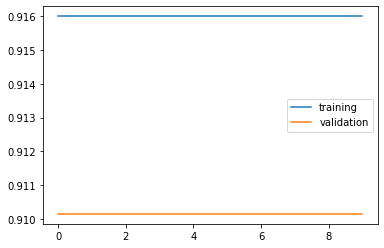

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [64]:
train_X.shape,train_y.shape

((43846, 57), (43846, 2))

In [65]:
train_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [67]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 2s 2ms/step - loss: 0.2924 - accuracy: 0.9142


[0.2924305200576782, 0.9142453074455261]

In [68]:
test_X.shape,test_y.shape

((10962, 57), (10962, 2))

In [69]:
test_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

**Initialization Of Proper Weights**

In [70]:
model =Sequential()

In [71]:
model.add(Dense(10, input_shape = (train_X.shape[1],), kernel_initializer='he_normal'  ,activation = 'sigmoid' ))
model.add(Dense(10, kernel_initializer='he_normal'  , activation = 'sigmoid' ))
model.add(Dense(10, kernel_initializer='he_normal'  ,activation = 'sigmoid' ))
model.add(Dense(train_y.shape[1], kernel_initializer='he_normal'  ,activation = 'softmax'))

In [72]:
sgd = optimizers.SGD()

In [73]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
history  = model.fit(train_X, train_y, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
3070/3070 - 7s - loss: 0.2992 - accuracy: 0.9160 - val_loss: 0.3025 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 2/10
3070/3070 - 5s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3021 - val_accuracy: 0.9101 - 5s/epoch - 2ms/step
Epoch 3/10
3070/3070 - 7s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3023 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 4/10
3070/3070 - 5s - loss: 0.2884 - accuracy: 0.9160 - val_loss: 0.3022 - val_accuracy: 0.9101 - 5s/epoch - 2ms/step
Epoch 5/10
3070/3070 - 6s - loss: 0.2883 - accuracy: 0.9160 - val_loss: 0.3020 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 6/10
3070/3070 - 6s - loss: 0.2883 - accuracy: 0.9160 - val_loss: 0.3020 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 7/10
3070/3070 - 6s - loss: 0.2883 - accuracy: 0.9160 - val_loss: 0.3022 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 8/10
3070/3070 - 7s - loss: 0.2882 - accuracy: 0.9160 - val_loss: 0.3023 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 9/

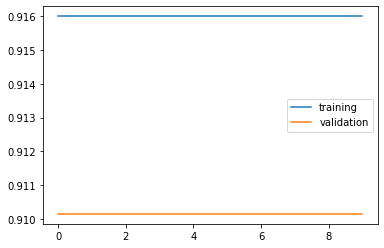

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [76]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.9142


[0.2922462224960327, 0.9142453074455261]

**2.Non Saturating Activation Function**

In [77]:
model = Sequential()

In [78]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'elu' ))
model.add(Dense(10, activation = 'elu' ))
model.add(Dense(10, activation = 'elu' ))
model.add(Dense(train_y.shape[1], activation = 'softmax'))

In [79]:
sgd = optimizers.SGD()

In [81]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:
history = model.fit(train_X,train_y,epochs=12,validation_split =0.3,batch_size =10,verbose=2)

Epoch 1/12
3070/3070 - 6s - loss: 0.3106 - accuracy: 0.9150 - val_loss: 0.2979 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 2/12
3070/3070 - 6s - loss: 0.2735 - accuracy: 0.9160 - val_loss: 0.2744 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 3/12
3070/3070 - 6s - loss: 0.2549 - accuracy: 0.9162 - val_loss: 0.2576 - val_accuracy: 0.9105 - 6s/epoch - 2ms/step
Epoch 4/12
3070/3070 - 7s - loss: 0.2423 - accuracy: 0.9180 - val_loss: 0.2477 - val_accuracy: 0.9118 - 7s/epoch - 2ms/step
Epoch 5/12
3070/3070 - 5s - loss: 0.2311 - accuracy: 0.9201 - val_loss: 0.2364 - val_accuracy: 0.9150 - 5s/epoch - 2ms/step
Epoch 6/12
3070/3070 - 6s - loss: 0.2194 - accuracy: 0.9253 - val_loss: 0.2252 - val_accuracy: 0.9189 - 6s/epoch - 2ms/step
Epoch 7/12
3070/3070 - 6s - loss: 0.2100 - accuracy: 0.9283 - val_loss: 0.2200 - val_accuracy: 0.9228 - 6s/epoch - 2ms/step
Epoch 8/12
3070/3070 - 6s - loss: 0.2042 - accuracy: 0.9310 - val_loss: 0.2080 - val_accuracy: 0.9252 - 6s/epoch - 2ms/step
Epoch 9/

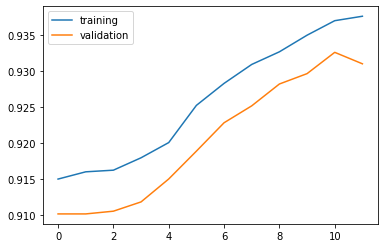

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [84]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 2s 1ms/step - loss: 0.1899 - accuracy: 0.9354


[0.18990589678287506, 0.9354103207588196]

3.**Optimizers**

In [85]:
model = Sequential()

In [86]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(train_y.shape[1], activation = 'softmax'))


In [88]:
adam =optimizers.Adam()
model.compile(optimizer=adam,loss ='binary_crossentropy',metrics=['accuracy'])

In [90]:
history  = model.fit(train_X, train_y, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
3070/3070 - 7s - loss: 0.2961 - accuracy: 0.9160 - val_loss: 0.2922 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 2/10
3070/3070 - 8s - loss: 0.2592 - accuracy: 0.9160 - val_loss: 0.2557 - val_accuracy: 0.9101 - 8s/epoch - 2ms/step
Epoch 3/10
3070/3070 - 7s - loss: 0.2431 - accuracy: 0.9160 - val_loss: 0.2469 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 4/10
3070/3070 - 6s - loss: 0.2318 - accuracy: 0.9164 - val_loss: 0.2359 - val_accuracy: 0.9139 - 6s/epoch - 2ms/step
Epoch 5/10
3070/3070 - 7s - loss: 0.2205 - accuracy: 0.9222 - val_loss: 0.2306 - val_accuracy: 0.9180 - 7s/epoch - 2ms/step
Epoch 6/10
3070/3070 - 8s - loss: 0.2086 - accuracy: 0.9267 - val_loss: 0.2151 - val_accuracy: 0.9219 - 8s/epoch - 3ms/step
Epoch 7/10
3070/3070 - 8s - loss: 0.1973 - accuracy: 0.9311 - val_loss: 0.2055 - val_accuracy: 0.9280 - 8s/epoch - 2ms/step
Epoch 8/10
3070/3070 - 13s - loss: 0.1901 - accuracy: 0.9360 - val_loss: 0.1998 - val_accuracy: 0.9304 - 13s/epoch - 4ms/step
Epoch 

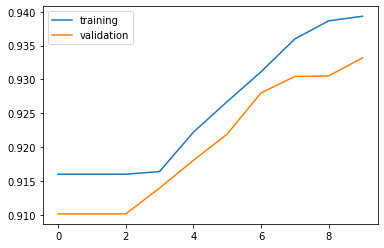

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [92]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 2s 2ms/step - loss: 0.1866 - accuracy: 0.9377


[0.18664556741714478, 0.9377138018608093]

**4.Batch Normalization**

In [93]:
modl = Sequential()

In [99]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(train_y.shape[1], activation = 'softmax'))

In [100]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [101]:
history = model.fit(train_X, train_y, epochs =10, validation_split = 0.3, batch_size=10, verbose=2)

Epoch 1/10
3070/3070 - 12s - loss: 0.2651 - accuracy: 0.9160 - val_loss: 0.2391 - val_accuracy: 0.9101 - 12s/epoch - 4ms/step
Epoch 2/10
3070/3070 - 10s - loss: 0.2142 - accuracy: 0.9285 - val_loss: 0.2385 - val_accuracy: 0.9101 - 10s/epoch - 3ms/step
Epoch 3/10
3070/3070 - 16s - loss: 0.2118 - accuracy: 0.9283 - val_loss: 0.2357 - val_accuracy: 0.9101 - 16s/epoch - 5ms/step
Epoch 4/10
3070/3070 - 15s - loss: 0.2086 - accuracy: 0.9294 - val_loss: 0.2308 - val_accuracy: 0.9101 - 15s/epoch - 5ms/step
Epoch 5/10
3070/3070 - 16s - loss: 0.2083 - accuracy: 0.9300 - val_loss: 0.2253 - val_accuracy: 0.9101 - 16s/epoch - 5ms/step
Epoch 6/10
3070/3070 - 14s - loss: 0.2054 - accuracy: 0.9310 - val_loss: 0.2313 - val_accuracy: 0.9101 - 14s/epoch - 5ms/step
Epoch 7/10
3070/3070 - 13s - loss: 0.2009 - accuracy: 0.9346 - val_loss: 0.2685 - val_accuracy: 0.9101 - 13s/epoch - 4ms/step
Epoch 8/10
3070/3070 - 13s - loss: 0.1996 - accuracy: 0.9365 - val_loss: 0.2242 - val_accuracy: 0.9101 - 13s/epoch - 4

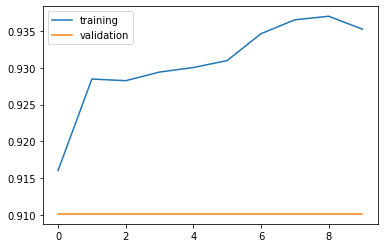

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training' , 'validation'])
plt.show()

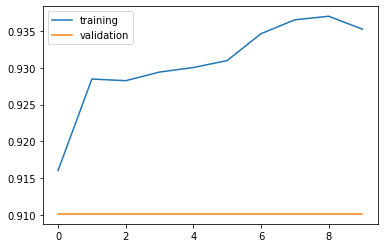

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [105]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 3s 2ms/step - loss: 0.2112 - accuracy: 0.9142


[0.21119272708892822, 0.9142453074455261]

**4.Batch Normalization**

In [ ]:
model = Sequential()

In [106]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(train_y.shape[1], activation = 'softmax'))

In [107]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                580       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 2)                 22        
                                                                 
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                      

In [109]:
history = model.fit(train_X,train_y,epochs=10,validation_split=0.3,batch_size=10,verbose=2)

Epoch 1/10
3070/3070 - 14s - loss: 0.2500 - accuracy: 0.9260 - val_loss: 0.3298 - val_accuracy: 0.9101 - 14s/epoch - 5ms/step
Epoch 2/10
3070/3070 - 11s - loss: 0.2055 - accuracy: 0.9357 - val_loss: 0.3159 - val_accuracy: 0.9101 - 11s/epoch - 3ms/step
Epoch 3/10
3070/3070 - 11s - loss: 0.2037 - accuracy: 0.9350 - val_loss: 0.3399 - val_accuracy: 0.9101 - 11s/epoch - 4ms/step
Epoch 4/10
3070/3070 - 11s - loss: 0.2021 - accuracy: 0.9366 - val_loss: 0.2663 - val_accuracy: 0.9101 - 11s/epoch - 4ms/step
Epoch 5/10
3070/3070 - 16s - loss: 0.2008 - accuracy: 0.9364 - val_loss: 0.3185 - val_accuracy: 0.9101 - 16s/epoch - 5ms/step
Epoch 6/10
3070/3070 - 16s - loss: 0.2017 - accuracy: 0.9365 - val_loss: 0.3589 - val_accuracy: 0.9101 - 16s/epoch - 5ms/step
Epoch 7/10
3070/3070 - 15s - loss: 0.1991 - accuracy: 0.9374 - val_loss: 0.2445 - val_accuracy: 0.9101 - 15s/epoch - 5ms/step
Epoch 8/10
3070/3070 - 11s - loss: 0.1975 - accuracy: 0.9382 - val_loss: 0.2310 - val_accuracy: 0.9333 - 11s/epoch - 4

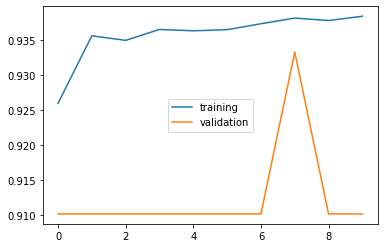

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [111]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 3s 2ms/step - loss: 0.2255 - accuracy: 0.9142


[0.2255469411611557, 0.9142453074455261]

**5.Dropout**

In [112]:
model = Sequential()

In [113]:
model.add(Dense(10, input_shape = (train_X.shape[1],), activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(train_y.shape[1], activation = 'softmax'))

In [114]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                580       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 2)                

In [116]:
history  = model.fit(train_X, train_y, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
3070/3070 - 6s - loss: 0.3150 - accuracy: 0.9152 - val_loss: 0.2807 - val_accuracy: 0.9101 - 6s/epoch - 2ms/step
Epoch 2/10
3070/3070 - 7s - loss: 0.2762 - accuracy: 0.9160 - val_loss: 0.2671 - val_accuracy: 0.9101 - 7s/epoch - 2ms/step
Epoch 3/10
3070/3070 - 5s - loss: 0.2653 - accuracy: 0.9160 - val_loss: 0.2570 - val_accuracy: 0.9111 - 5s/epoch - 2ms/step
Epoch 4/10
3070/3070 - 7s - loss: 0.2541 - accuracy: 0.9170 - val_loss: 0.2494 - val_accuracy: 0.9123 - 7s/epoch - 2ms/step
Epoch 5/10
3070/3070 - 9s - loss: 0.2458 - accuracy: 0.9184 - val_loss: 0.2416 - val_accuracy: 0.9135 - 9s/epoch - 3ms/step
Epoch 6/10
3070/3070 - 5s - loss: 0.2408 - accuracy: 0.9189 - val_loss: 0.2344 - val_accuracy: 0.9167 - 5s/epoch - 2ms/step
Epoch 7/10
3070/3070 - 8s - loss: 0.2323 - accuracy: 0.9213 - val_loss: 0.2290 - val_accuracy: 0.9198 - 8s/epoch - 2ms/step
Epoch 8/10
3070/3070 - 12s - loss: 0.2244 - accuracy: 0.9239 - val_loss: 0.2220 - val_accuracy: 0.9207 - 12s/epoch - 4ms/step
Epoch 

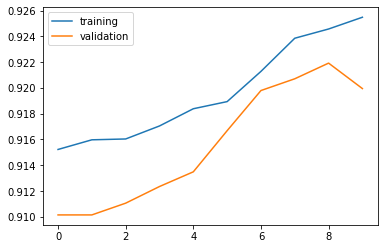

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [118]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 2s 1ms/step - loss: 0.2158 - accuracy: 0.9246


[0.21576158702373505, 0.9245769381523132]

**CONSOLIDATED ARCHITECTURE**

In [119]:
model = Sequential()

In [120]:
model.add(Dense(10, input_shape = (train_X.shape[1],), kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(train_y.shape[1], kernel_initializer='he_normal' , activation = 'softmax'))

In [121]:
adam = optimizers.Adam()
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [122]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                580       
                                                                 
 batch_normalization_9 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 10)               

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'loss',patience=3)

In [124]:
history  = model.fit(train_X, train_y, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
3070/3070 - 10s - loss: 0.3272 - accuracy: 0.8889 - val_loss: 0.2478 - val_accuracy: 0.9111 - 10s/epoch - 3ms/step
Epoch 2/10
3070/3070 - 8s - loss: 0.2486 - accuracy: 0.9159 - val_loss: 0.2265 - val_accuracy: 0.9163 - 8s/epoch - 3ms/step
Epoch 3/10
3070/3070 - 9s - loss: 0.2319 - accuracy: 0.9177 - val_loss: 0.2071 - val_accuracy: 0.9215 - 9s/epoch - 3ms/step
Epoch 4/10
3070/3070 - 9s - loss: 0.2242 - accuracy: 0.9205 - val_loss: 0.1988 - val_accuracy: 0.9261 - 9s/epoch - 3ms/step
Epoch 5/10
3070/3070 - 8s - loss: 0.2178 - accuracy: 0.9259 - val_loss: 0.1952 - val_accuracy: 0.9301 - 8s/epoch - 3ms/step
Epoch 6/10
3070/3070 - 9s - loss: 0.2150 - accuracy: 0.9275 - val_loss: 0.1901 - val_accuracy: 0.9321 - 9s/epoch - 3ms/step
Epoch 7/10
3070/3070 - 9s - loss: 0.2116 - accuracy: 0.9295 - val_loss: 0.1908 - val_accuracy: 0.9315 - 9s/epoch - 3ms/step
Epoch 8/10
3070/3070 - 10s - loss: 0.2098 - accuracy: 0.9302 - val_loss: 0.1882 - val_accuracy: 0.9326 - 10s/epoch - 3ms/step
Epoc

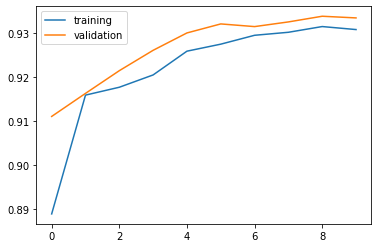

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [126]:
model.evaluate(train_X,train_y)

1371/1371 [==============================] - 2s 2ms/step - loss: 0.1781 - accuracy: 0.9380


[0.17808489501476288, 0.937964677810669]